In [1]:
from astropy.io import fits
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
from scipy.optimize import curve_fit

Mean value of bias:  [[1049.05 1053.7  1052.85 ...  988.    989.8   988.85]
 [1051.55 1056.65 1050.   ...  986.75  998.    988.95]
 [1053.5  1048.65 1055.8  ...  988.3   986.45  988.3 ]
 ...
 [1054.6  1052.55 1053.   ...  991.4   986.15  997.75]
 [1051.15 1050.45 1050.25 ...  993.85  983.2   988.55]
 [1050.7  1048.65 1048.95 ...  986.3   989.45  990.2 ]]


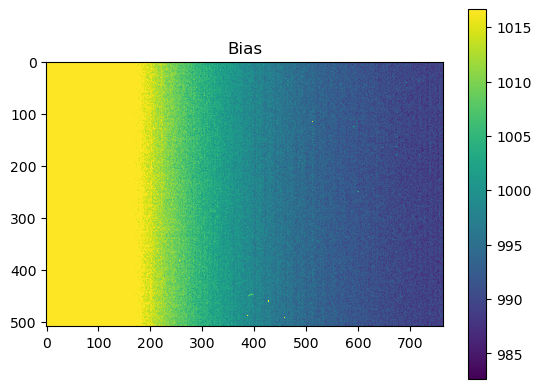

RMS of bias:  16.99631931524274


In [2]:
Mean=0
bias = np.zeros((510, 765))
for i in range(20):
    filename = f"pyobs-20240528-0{685+i:03d}-b00.fits"
    with fits.open(filename) as hdulist:
        hdu = hdulist[0]
        mean=np.mean(hdu.data)
        for j in range(510):
            for k in range(765):
                bias[j][k] +=  hdu.data[j][k]

        Mean+=mean
bias/=20
print('Mean value of bias: ', bias)

data = bias
med,sigma = np.median(data),np.std(data)
plt.imshow (data,vmin = med - sigma , vmax = med + sigma )
plt.title('Bias')
plt.colorbar ()
plt.show ()
#bias image
rms_bias = np.sqrt(np.mean((bias - np.mean(bias))**2))
print('RMS of bias: ', rms_bias)

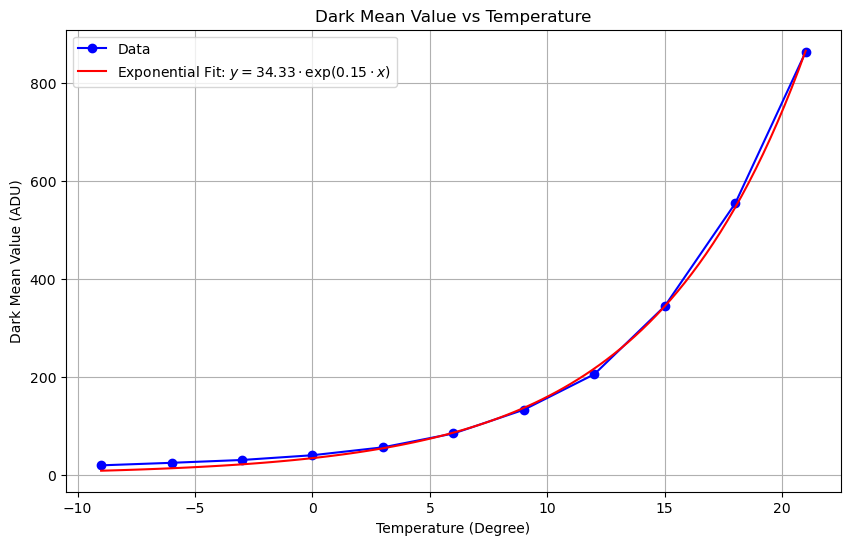

a * exp(b * x), fitted parameters: a = 34.32910176617205, b = 0.1536796888152454


In [3]:
Mean=0
ADU = np.zeros(11)
Temp = np.zeros(11)
for i in range(11):
    filename = f"pyobs-20240528-0{669+i:03d}-d00.fits"
    with fits.open(filename) as hdulist:
        hdu = hdulist[0]
        mean=np.mean(hdu.data)-np.mean(bias)
        ADU[i]=mean
        Temp[i] = 21-3*i
# Define an exponential function
def exponential_func(x, a, b):
    return a * np.exp(b * x)

# Fit the exponential function to your data
popt, pcov = curve_fit(exponential_func, Temp, ADU)

# Extract the fitted parameters
a_fit, b_fit = popt

# Generate points for the fitted curve
Temp_fit = np.linspace(min(Temp), max(Temp), 100)
ADU_fit = exponential_func(Temp_fit, a_fit, b_fit)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(Temp, ADU, color='blue', marker='o', label='Data')
plt.plot(Temp_fit, ADU_fit, color='red', linestyle='-', label='Exponential Fit: '+rf'$y = {a_fit:.2f} \cdot \exp({b_fit:.2f} \cdot x)$')

# Add titles and labels
plt.title('Dark Mean Value vs Temperature')
plt.xlabel('Temperature (Degree)')
plt.ylabel('Dark Mean Value (ADU)')



# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()
print(f"a * exp(b * x), fitted parameters: a = {a_fit}, b = {b_fit}")

average dark:  [[ 42.15  31.5   27.35 ...  49.6   29.8  143.95]
 [ 35.65  18.15  26.8  ...  29.25   7.2   28.45]
 [ 28.3   30.95  16.2  ...  37.3   35.15  34.9 ]
 ...
 [ 23.6   28.65  31.6  ...  18.    30.65  18.45]
 [ 23.65  22.55  33.35 ...  11.95  31.    20.85]
 [ 25.9   40.35  20.45 ...  16.3   24.55  23.6 ]]


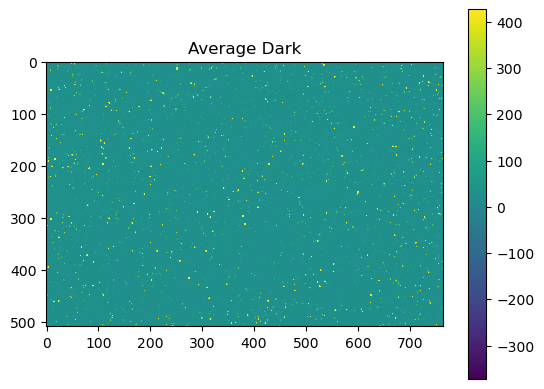

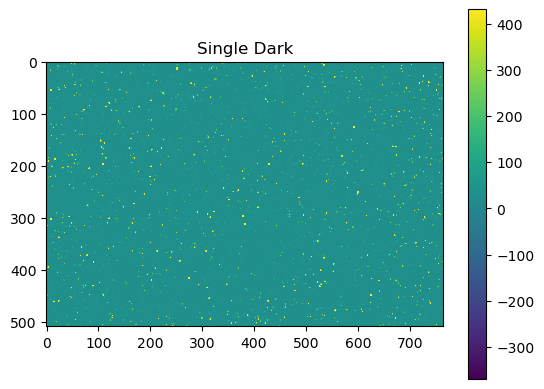

36.825177239523256 40.21045520953481 399.52400347432246 400.74911206979215


In [4]:
#average dark
Mean=0
dark = np.zeros((510, 765))
for i in range(5):
    filename = f"pyobs-20240528-0{680+i:03d}-d00.fits"
    with fits.open(filename) as hdulist:
        hdu = hdulist[0]
        mean=np.mean(hdu.data)
        for j in range(510):
            for k in range(765):
                dark[j][k] +=  hdu.data[j][k]

        Mean+=mean
dark-=5*bias
dark/=5
print('average dark: ', dark)

data = dark
med,sigma = np.median(data),np.std(data)
plt.title('Average Dark')
plt.imshow (data,vmin = med - sigma , vmax = med + sigma )
plt.colorbar ()
plt.show ()

data1 = fits.getdata ("pyobs-20240528-0676-d00.fits")-bias
med1,sigma1 = np.median(data1),np.std(data1)
plt.title('Single Dark')
plt.imshow (data1,vmin = med1 - sigma1 , vmax = med1 + sigma1 )
plt.colorbar ()
plt.show ()
print(np.mean(data),np.mean(data1),sigma,sigma1)


Mean value of flat 1 :  4233.466908624888


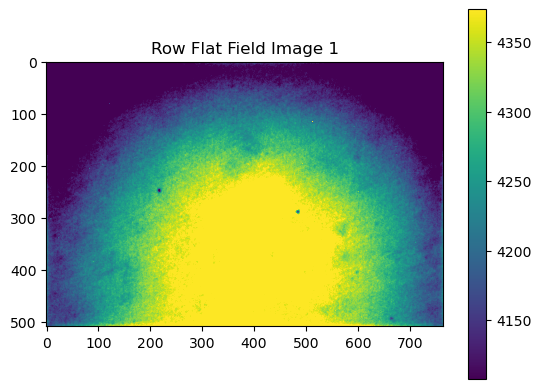

RMS of flat 1:  132.802363704397
Mean value of flat 2 :  7439.087240975691


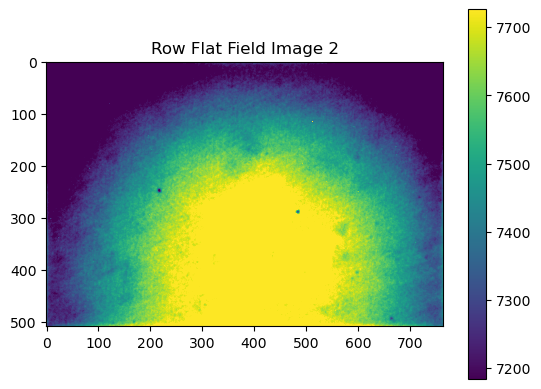

RMS of flat 2:  270.9826444063922
Mean value of flat 3 :  13851.876555854584


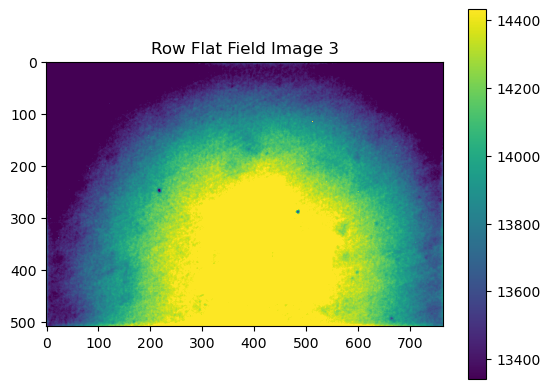

RMS of flat 3:  545.3349309700961
Mean value of flat 4 :  26629.79015165108


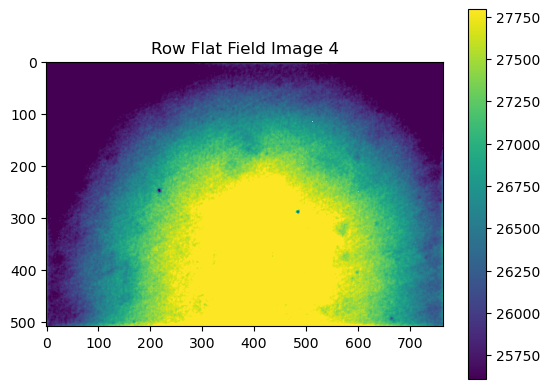

RMS of flat 4:  1091.9214329916915
Mean value of flat 5 :  39347.56975300099


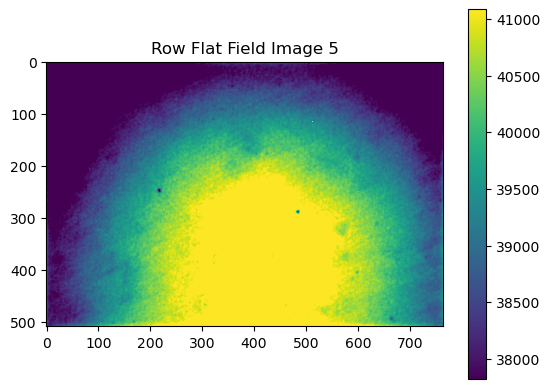

RMS of flat 5:  1632.322055935097
Mean value of flat 6 :  51998.794212994995


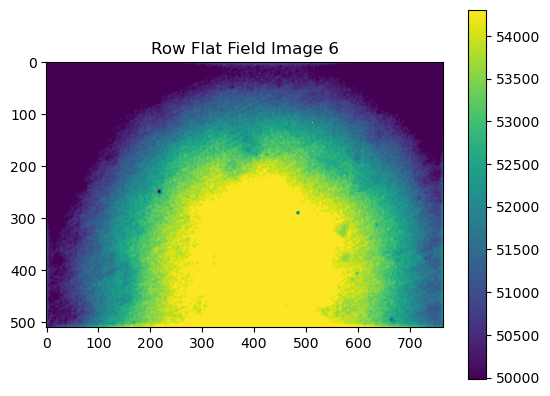

RMS of flat 6:  2163.556305589515
Mean value of flat 7 :  63893.73802332436


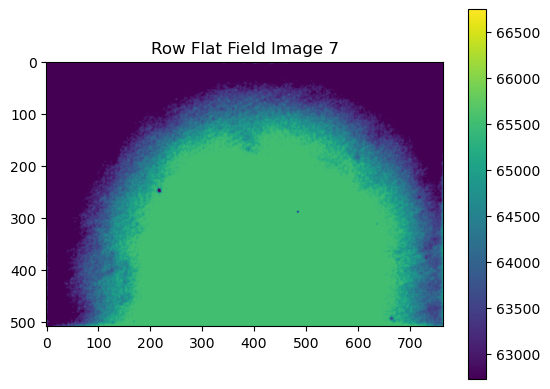

RMS of flat 7:  2012.2479923733108


In [5]:
from sklearn.linear_model import LinearRegression

flat = [np.zeros((510, 765)) for _ in range(7)]
Meanflat = np.zeros(7)
Exptime = np.zeros(7)
VarianceFlat=np.zeros(7)
for l in range(7):
    Mean=0    
    for i in range(15):

        filename = f"pyobs-20240528-0{705+l*15+i:03d}-f00.fits"
        with fits.open(filename) as hdulist:
            hdu = hdulist[0]
            data = hdu.data
            mean = np.mean(data)
            flat[l] += data  # Use vectorized addition
            Mean += mean
            Meanflat[l]= Mean / 15
            Exptime[l]=hdu.header['EXPTIME']
    flat[l] /= 15  # Average the accumulated data
    print('Mean value of flat', l+1, ': ', Mean / 15)

    data = flat[l]
    med, sigma = np.median(data), np.std(data)
    VarianceFlat[l]=np.var(flat[l])
    plt.imshow(data, vmin=med - sigma, vmax=med + sigma)
    plt.colorbar()
    plt.title(f'Row Flat Field Image {l+1}')
    plt.show()
    print(f'RMS of flat {l+1}: ', sigma)

Mean value of flat 1 :  3227.674862232475


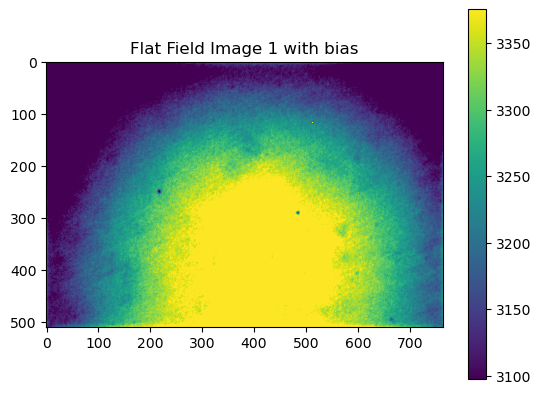

RMS of flat 1:  139.07300989988724
Mean value of flat 2 :  6433.29519458328


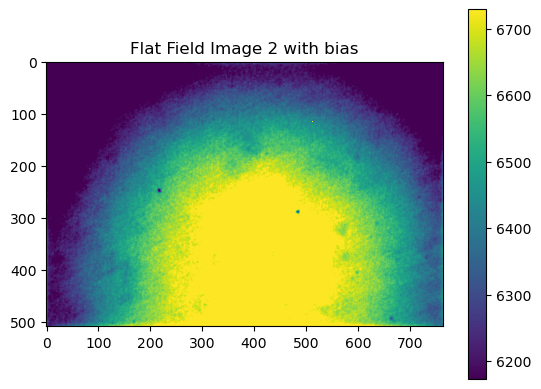

RMS of flat 2:  277.8667302912006
Mean value of flat 3 :  12846.084509462173


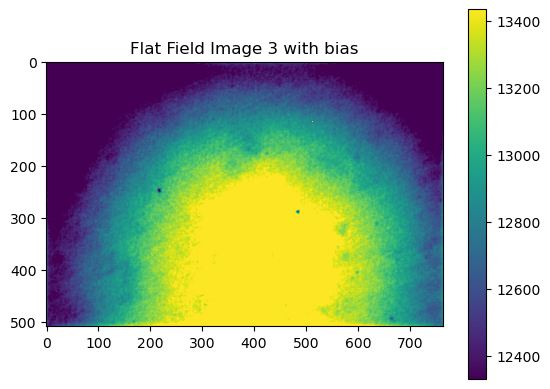

RMS of flat 3:  552.5244644651941
Mean value of flat 4 :  25623.998105258655


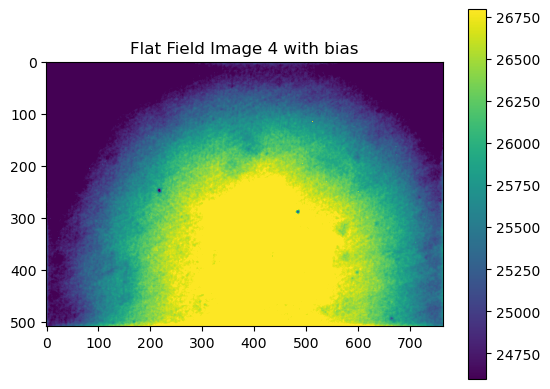

RMS of flat 4:  1099.2573091692993
Mean value of flat 5 :  38341.777706608555


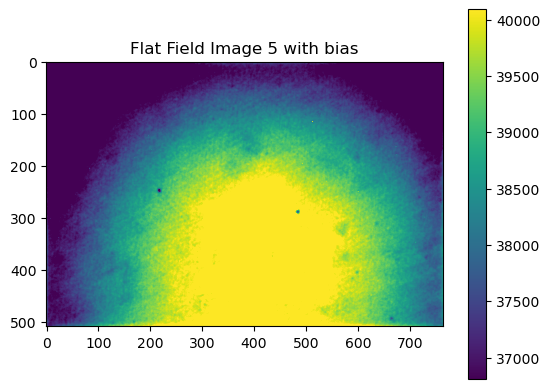

RMS of flat 5:  1639.7087201886097
Mean value of flat 6 :  50993.00216660259


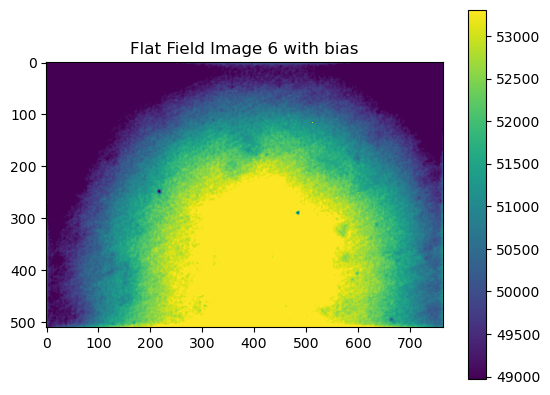

RMS of flat 6:  2170.9677599962447
Mean value of flat 7 :  62887.945976931966


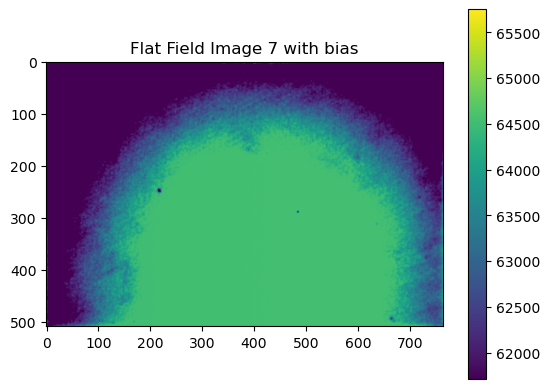

RMS of flat 7:  2019.8645330383124


In [6]:
flat = [np.zeros((510, 765)) for _ in range(7)]
Meanflat = np.zeros(7)
Exptime = np.zeros(7)
for l in range(7):
    Mean=0    
    for i in range(15):

        filename = f"pyobs-20240528-0{705+l*15+i:03d}-f00.fits"
        with fits.open(filename) as hdulist:
            hdu = hdulist[0]
            data = hdu.data-bias
            mean = np.mean(data)
            flat[l] += data  # Use vectorized addition
            Mean += mean
            Meanflat[l]= Mean / 15
            Exptime[l]=hdu.header['EXPTIME']
    flat[l] /= 15  # Average the accumulated data
    print('Mean value of flat', l+1, ': ', Mean / 15)

    data = flat[l]
    med, sigma = np.median(data), np.std(data)
    plt.imshow(data, vmin=med - sigma, vmax=med + sigma)
    plt.colorbar()
    plt.title(f'Flat Field Image {l+1} with bias')
    plt.show()
    print(f'RMS of flat {l+1}: ', sigma)

Mean value of flat 1 :  3227.552111641676


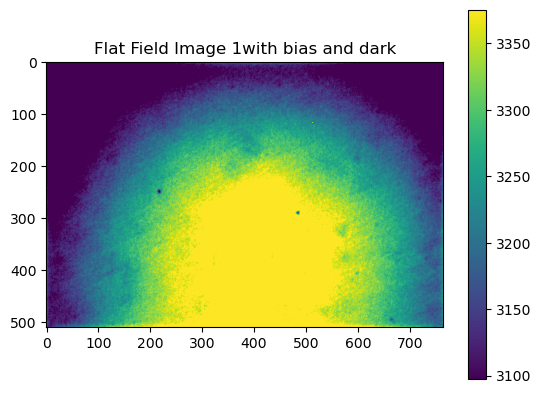

RMS of flat 1:  139.0624892424621
Mean value of flat 2 :  6433.049693401682


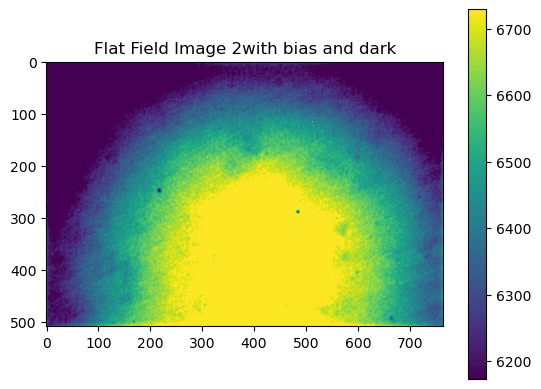

RMS of flat 2:  277.8465883617849
Mean value of flat 3 :  12845.593507098978


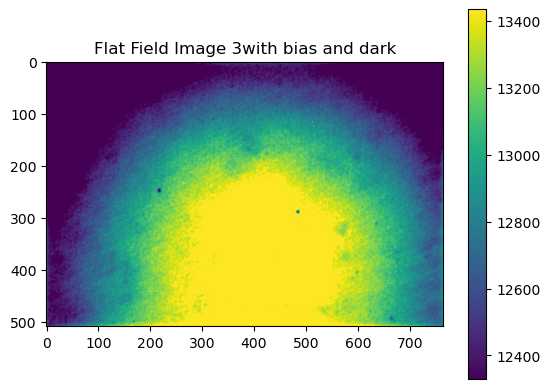

RMS of flat 3:  552.488970692882
Mean value of flat 4 :  25623.016100532277


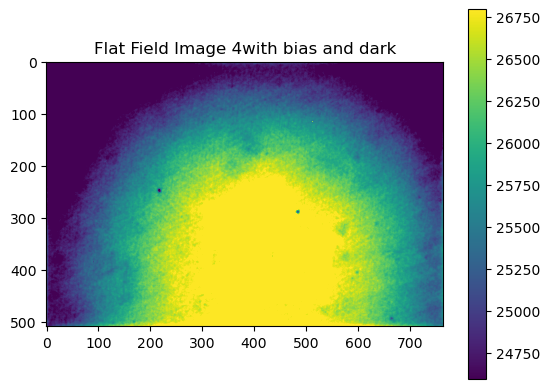

RMS of flat 4:  1099.1938974585064
Mean value of flat 5 :  38340.30469951898


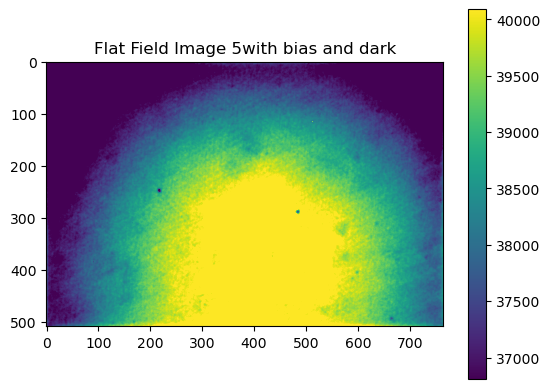

RMS of flat 5:  1639.6247037607945
Mean value of flat 6 :  50991.038157149815


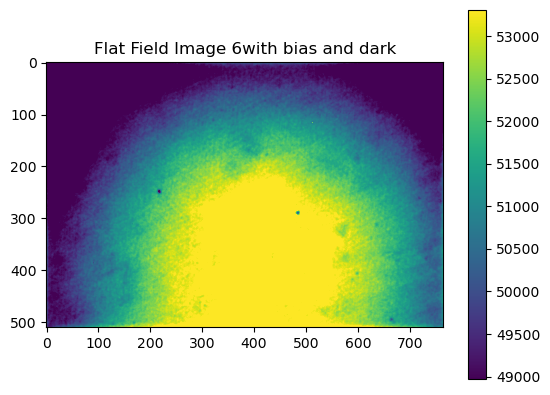

RMS of flat 6:  2170.8750198851576
Mean value of flat 7 :  62885.490965115976


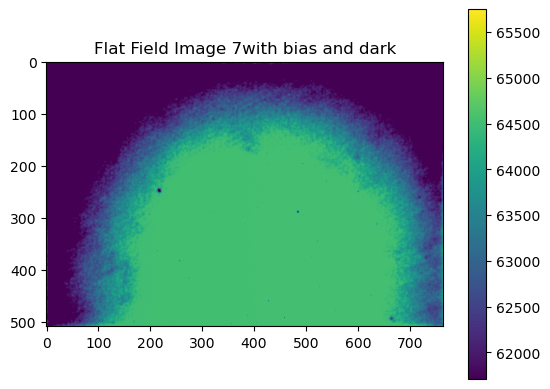

RMS of flat 7:  2019.9626315268758


In [7]:
flat = [np.zeros((510, 765)) for _ in range(7)]
Meanflat = np.zeros(7)
Exptime = np.zeros(7)
for l in range(7):
    Mean=0    
    for i in range(15):

        filename = f"pyobs-20240528-0{705+l*15+i:03d}-f00.fits"
        with fits.open(filename) as hdulist:
            hdu = hdulist[0]
            data = hdu.data-bias-dark*hdu.header['EXPTIME']/300
            mean = np.mean(data)
            flat[l] += data  # Use vectorized addition
            Mean += mean
            Meanflat[l]= Mean / 15
            Exptime[l]=hdu.header['EXPTIME']
    flat[l] /= 15  # Average the accumulated data
    print('Mean value of flat', l+1, ': ', Mean / 15)

    data = flat[l]
    med, sigma = np.median(data), np.std(data)
    plt.imshow(data, vmin=med - sigma, vmax=med + sigma)
    plt.colorbar()
    plt.title(f'Flat Field Image {l+1}with bias and dark')
    plt.show()
    print(f'RMS of flat {l+1}: ', sigma)
FLAT=flat[4]/Meanflat[4]

Mean value of flat 1 :  3227.540827381775


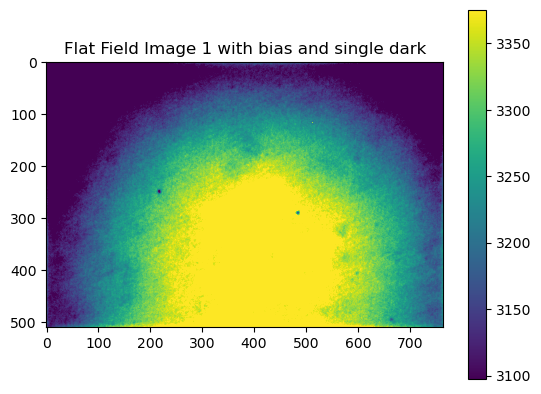

RMS of flat 1:  139.06174381585978
Mean value of flat 2 :  6433.027124881881


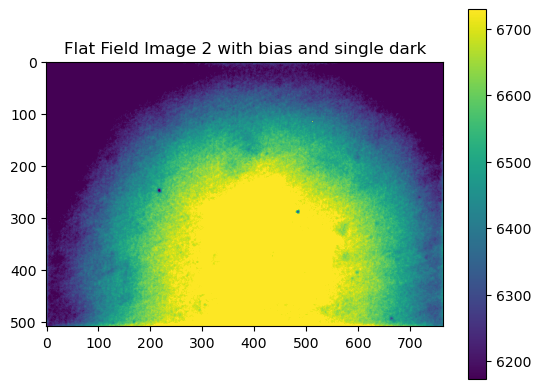

RMS of flat 2:  277.8450933593234
Mean value of flat 3 :  12845.548370059378


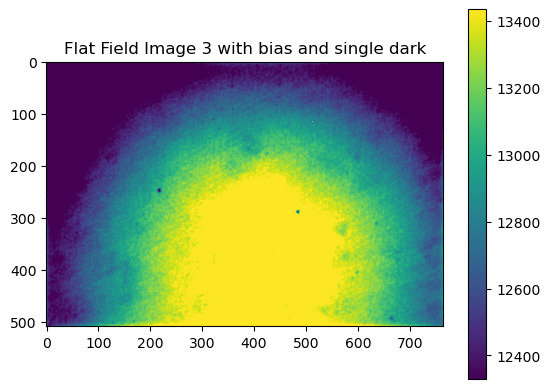

RMS of flat 3:  552.4859236166433
Mean value of flat 4 :  25622.92582645306


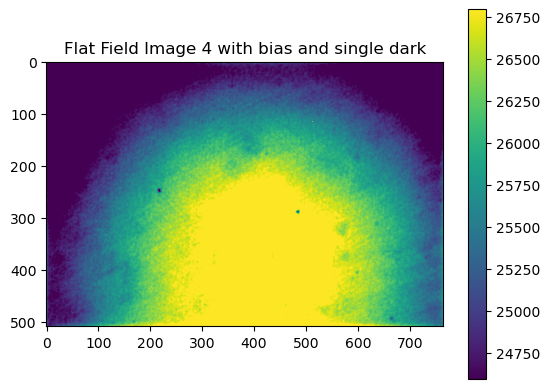

RMS of flat 4:  1099.1877013948977
Mean value of flat 5 :  38340.16928840019


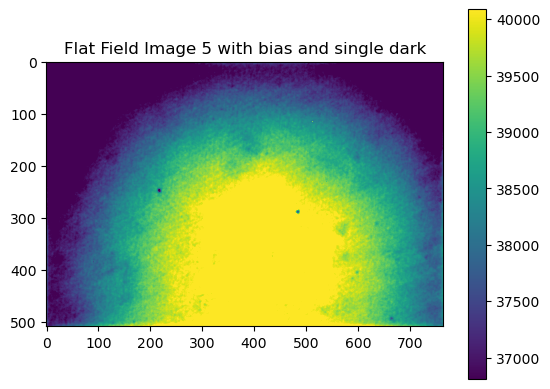

RMS of flat 5:  1639.6155578274036
Mean value of flat 6 :  50990.857608991406


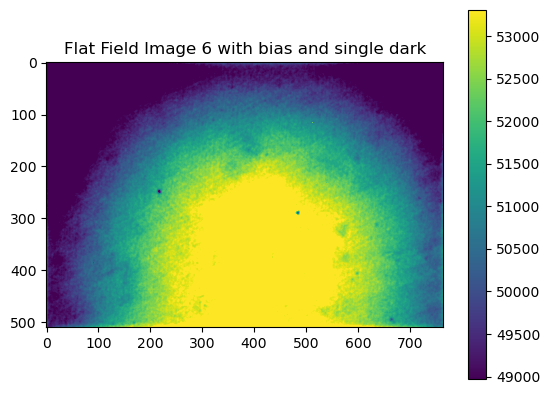

RMS of flat 6:  2170.862426046441
Mean value of flat 7 :  62885.26527991799


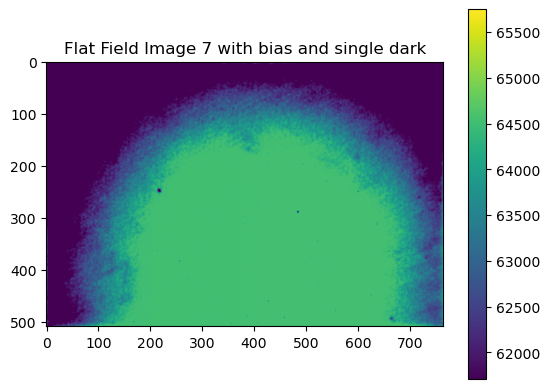

RMS of flat 7:  2019.9549424352583


In [8]:
flat = [np.zeros((510, 765)) for _ in range(7)]
Meanflat = np.zeros(7)
Exptime = np.zeros(7)
for l in range(7):
    Mean=0    
    for i in range(15):

        filename = f"pyobs-20240528-0{705+l*15+i:03d}-f00.fits"
        with fits.open(filename) as hdulist:
            hdu = hdulist[0]
            data = hdu.data-bias-(fits.getdata ("pyobs-20240528-0676-d00.fits")-bias)*hdu.header['EXPTIME']/300  
            mean = np.mean(data)
            flat[l] += data  # Use vectorized addition
            Mean += mean
            Meanflat[l]= Mean / 15
            Exptime[l]=hdu.header['EXPTIME']
    flat[l] /= 15  # Average the accumulated data
    print('Mean value of flat', l+1, ': ', Mean / 15)

    data = flat[l]
    med, sigma = np.median(data), np.std(data)
    plt.imshow(data, vmin=med - sigma, vmax=med + sigma)
    plt.colorbar()
    plt.title(f'Flat Field Image {l+1} with bias and single dark')
    plt.show()
    print(f'RMS of flat {l+1}: ', sigma)
FLAT=flat[4]/Meanflat[4]

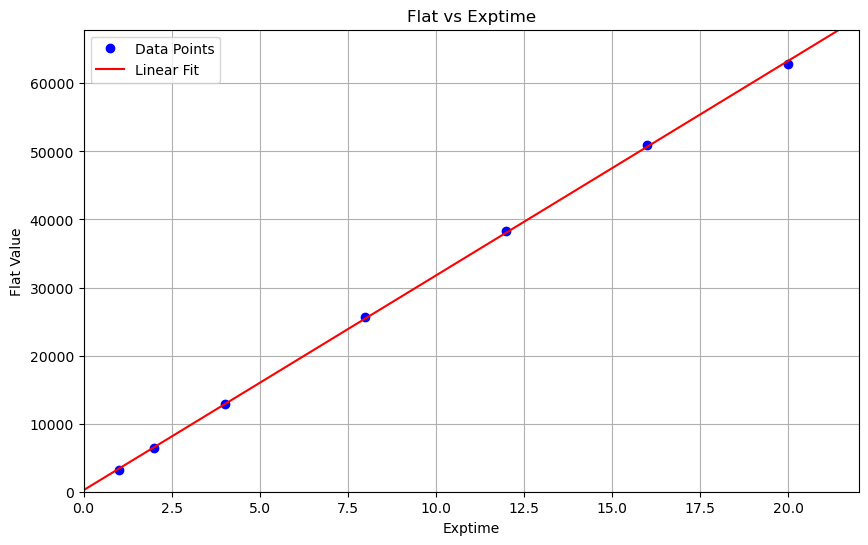

Slope: 3154.06
Intercept: 234.19
Standard Error: 15.83


In [9]:

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(Exptime, Meanflat)

# Generate values for the regression line
regression_x = np.linspace(0, Exptime.max() + 2, 100)
regression_y = slope * regression_x + intercept

# Calculate the error range
confidence_interval = 1.96 * std_err  # 95% confidence interval
regression_y_upper = regression_y + confidence_interval
regression_y_lower = regression_y - confidence_interval

# Plot the data and the regression line
plt.figure(figsize=(10, 6))
plt.plot(Exptime, Meanflat, color='blue', marker='o', linestyle='none', label='Data Points')
plt.plot(regression_x, regression_y, color='red', label='Linear Fit')


# Add titles and labels
plt.title('Flat vs Exptime')
plt.xlabel('Exptime')
plt.ylabel('Flat Value')

# Set the x and y axis limits to start from 0
plt.xlim(0, Exptime.max() + 2)
plt.ylim(0, max(Meanflat) + 5000)

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)  # Add grid for better visualization


plt.show()

# Print the slope, intercept, and standard error
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"Standard Error: {std_err:.2f}")

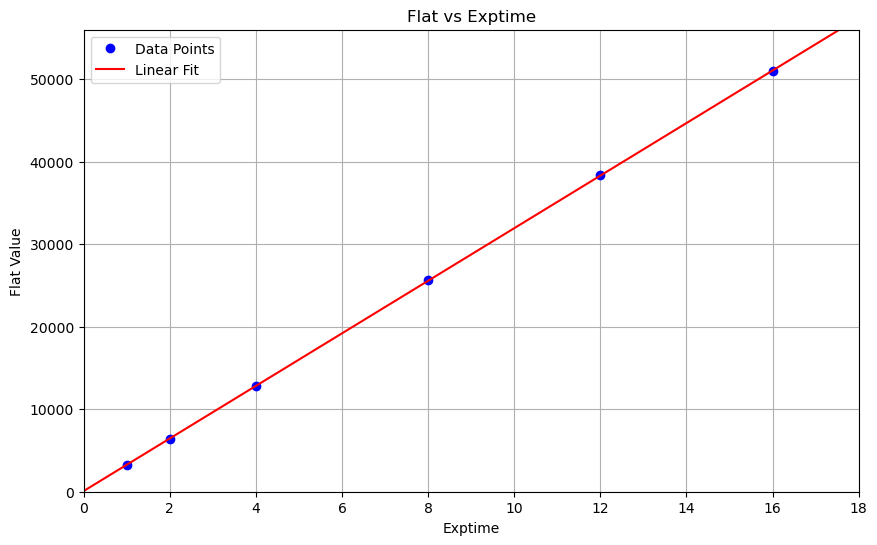

Slope: 3185.28
Intercept: 82.14
Standard Error: 3.80


In [10]:
Exptime = Exptime[:-1]
Meanflat = Meanflat[:-1]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(Exptime, Meanflat)

# Generate values for the regression line
regression_x = np.linspace(0, Exptime.max() + 2, 100)
regression_y = slope * regression_x + intercept

# Calculate the error range
confidence_interval = 1.96 * std_err  # 95% confidence interval
regression_y_upper = regression_y + confidence_interval
regression_y_lower = regression_y - confidence_interval

# Plot the data and the regression line
plt.figure(figsize=(10, 6))
plt.plot(Exptime, Meanflat, color='blue', marker='o', linestyle='none', label='Data Points')
plt.plot(regression_x, regression_y, color='red', label='Linear Fit')

# Add titles and labels
plt.title('Flat vs Exptime')
plt.xlabel('Exptime')
plt.ylabel('Flat Value')

# Set the x and y axis limits to start from 0
plt.xlim(0, Exptime.max() + 2)
plt.ylim(0, max(Meanflat) + 5000)

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)  # Add grid for better visualization


plt.show()

# Print the slope, intercept, and standard error
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"Standard Error: {std_err:.2f}")

Slope (k) of the regression line: 1.8323996469735482
Standard error of the slope: 0.07900903161994692


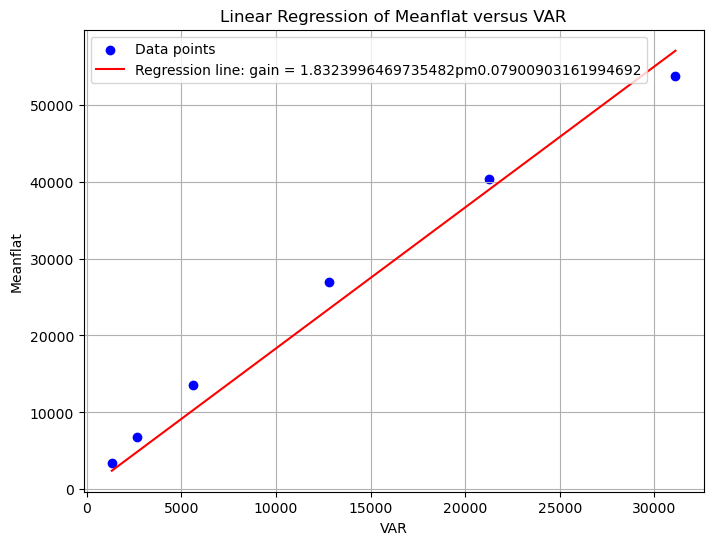

In [11]:
flat = [np.zeros((510, 765)) for _ in range(7)]
Meanflat = np.zeros(7)
Exptime = np.zeros(7)
Variances = np.zeros((7, 15))
VAR = np.zeros(7)
# Loop over the 7 sets of images
for l in range(7):
    Mean = 0
    for i in range(15):
        filename = f"pyobs-20240528-0{705 + l * 15 + i:03d}-f00.fits"
        with fits.open(filename) as hdulist:
            hdu = hdulist[0]
            data = hdu.data - bias - dark * hdu.header['EXPTIME'] / 300
            
            if i == 0:
                Meanflat[l] = np.mean(data[405:455, 350:400])
            else:
                diff = data - mean
                Std=np.std(diff[405:455, 350:400])
                Var=Std**2/2
                Variances[l, i] = Var
for l in range(7):
    VAR_sum = 0.0  # Initialize sum of variances for set l
    for i in range(15):
        VAR_sum += Variances[l, i]
    
    VAR[l] = VAR_sum / 14  # Compute average variance for set l
    
# Perform linear regression on VAR versus Meanflat
Meanflat = Meanflat[:-1]
VAR = VAR[:-1]


# Swap x and y for regression
x = VAR
y = Meanflat

k = np.sum(x * y) / np.sum(x ** 2)

# Calculate the standard error of the slope
n = len(x)
y_pred = k * x
residuals = y - y_pred
std_err = np.sqrt(np.sum(residuals**2) / (n - 2)) / np.sqrt(np.sum(x**2))

print(f"Slope (k) of the regression line: {k}")
print(f"Standard error of the slope: {std_err}")

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, k * x, color='red', label=f"Regression line: gain = {k}pm{std_err}")
plt.title('Linear Regression of Meanflat versus VAR')
plt.xlabel('VAR')
plt.ylabel('Meanflat')
plt.legend()
plt.grid(True)
plt.show()



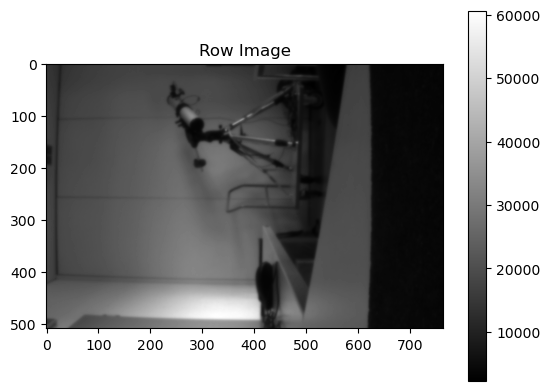

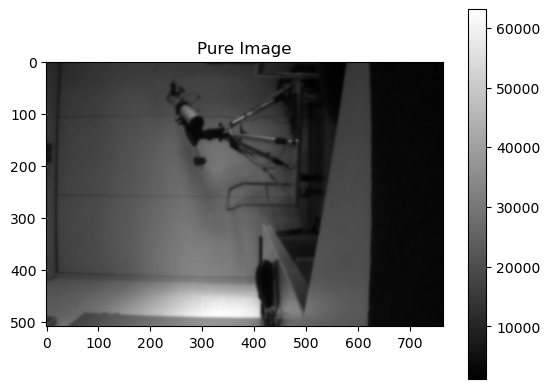

In [12]:

Tel = np.zeros((510, 765))
Telpure = np.zeros((510, 765))  
for i in range(5):
    filename = f"pyobs-20240528-0{949+i:03d}-e00.fits"
    with fits.open(filename) as hdulist:
            hdu = hdulist[0]
            Tel += hdu.data
            Telpure += (hdu.data-bias-dark*hdu.header['EXPTIME']/300) *FLAT

Tel /=5
Telpure /=5

plt.imshow(Tel,'gray')  # You can specify a colormap (e.g., 'gray') if needed
plt.colorbar()  # Optionally add a colorbar to show intensity scale
plt.title('Row Image')  # Add a title to the plot
plt.show()


plt.imshow(Telpure,'gray')  # You can specify a colormap (e.g., 'gray') if needed
plt.colorbar()  # Optionally add a colorbar to show intensity scale
plt.title('Pure Image')  # Add a title to the plot
plt.show()